# 第一部分 利用Google Finance抓取股價資料

In [1]:
import requests
import pandas as pd
import io

def get_params(symbol,startdate,enddate):
    params = {'q': symbol,
              'startdate': startdate,
              'enddate': enddate,
              'output': "csv"
    }
    return params
    
def main():
    symbol = input('請輸入股票代碼:')
    startdate = input('請輸入起始日期(ex.2016-01-01):')
    enddate = input('請輸入結束日期(ex.2017-12-31):')
    url = 'http://finance.google.com/finance/historical'
    
    r = requests.get(url, get_params(symbol,startdate,enddate))
    df = pd.read_csv(io.StringIO(r.text))
    return df
    
main()

請輸入股票代碼:AAPL
請輸入起始日期(ex.2016-01-01):2016-01-01
請輸入結束日期(ex.2017-12-31):2016-01-31


,Date,Open,High,Low,Close,Volume
0,29-Jan-16,94.79,97.34,94.35,97.34,64010141
1,28-Jan-16,93.79,94.52,92.39,94.09,55557109
2,27-Jan-16,96.04,96.63,93.34,93.42,132224500
3,26-Jan-16,99.93,100.88,98.07,99.99,63538305
4,25-Jan-16,101.52,101.53,99.21,99.44,51196375
5,22-Jan-16,98.63,101.46,98.37,101.42,65562769
6,21-Jan-16,97.06,97.88,94.94,96.30,52054521
7,20-Jan-16,95.10,98.19,93.42,96.79,72008265
8,19-Jan-16,98.41,98.65,95.50,96.66,52841349
9,15-Jan-16,96.20,97.71,95.36,97.13,79010008


# 第二部分 抓取台股資料並繪圖

In [2]:
%matplotlib inline

import pandas_datareader.data as web
import matplotlib.pyplot as plt
import kchart

from datetime import datetime

#利用yahoo抓取台股資料,然後顯示前五筆資料
df1 = web.DataReader("2330.tw", 'yahoo', datetime(2017,6,1))
df1.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-05-31,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-01,205.0,207.0,204.5,207.0,200.322586,27589000.0
2017-06-02,208.5,209.0,207.5,209.0,202.258072,22573000.0
2017-06-03,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-05,209.5,212.0,209.0,212.0,205.161301,21457000.0


In [3]:
#顯示後五筆資料
df1.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-29,235.0,236.0,234.5,234.5,234.5,25762797.0
2017-11-30,226.5,230.5,226.0,226.0,226.0,109231770.0
2017-12-01,228.5,233.5,227.5,231.0,231.0,37446265.0
2017-12-04,232.5,234.5,231.0,234.0,234.0,21635032.0
2017-12-05,231.0,231.0,228.5,229.5,229.5,29664765.0


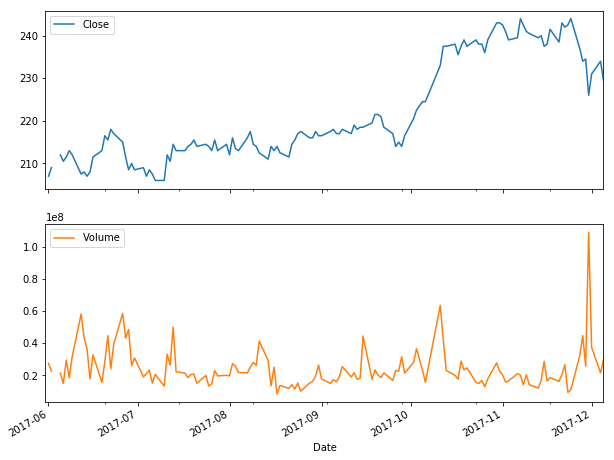

In [4]:
# 使用 matplotlib畫圖
df1[['Close','Volume']].plot(subplots = True, figsize = (10, 8))
plt.legend(loc='best')

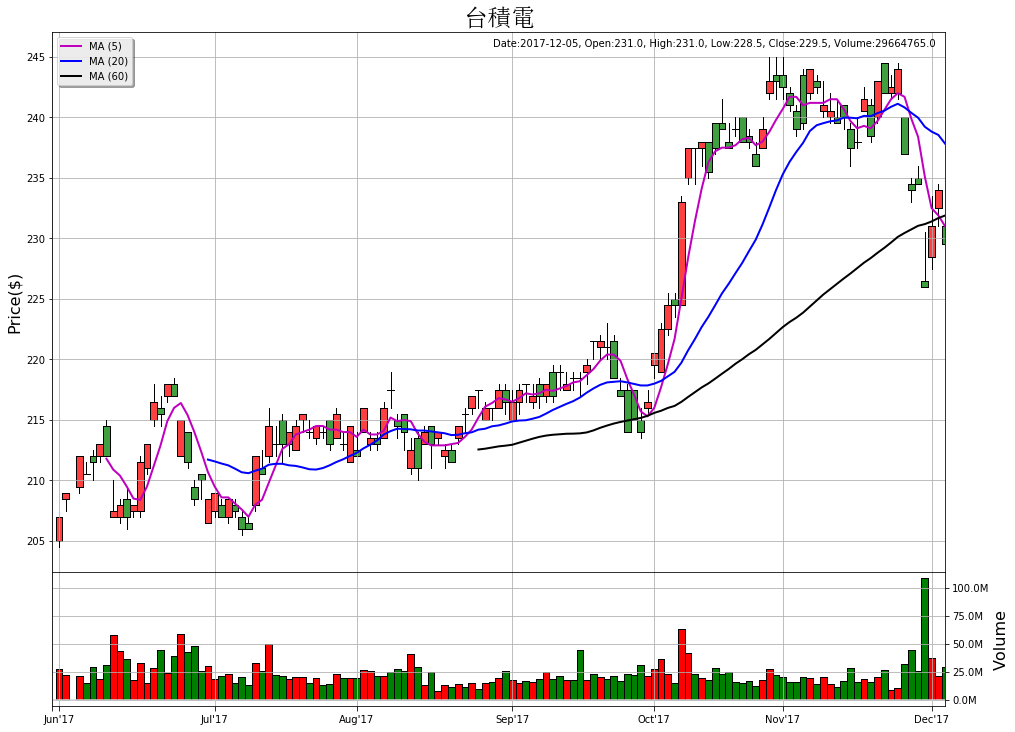

In [5]:
#使用 kchart畫圖
kchart.draw(df1,"台積電")